<a href="https://colab.research.google.com/github/rtkartista/RobotSystems-avadhanr/blob/master/SimpleSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

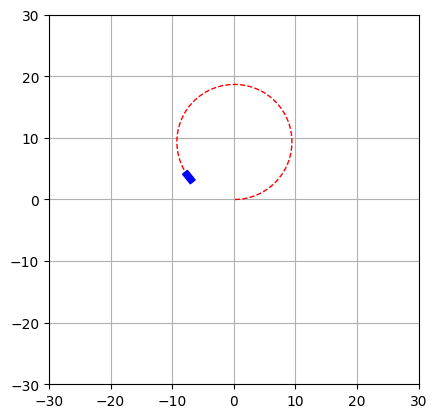

In [7]:
import numpy as np
import pdb

import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D

class CarAnimator:
    def __init__(self, model, dt=0.1, frames=200, output_filename="output"):
        self.filename = output_filename
        self.model = model
        self.dt = dt
        self.frames = frames

        self.fig, self.ax = plt.subplots()
        self.ax.set_aspect('equal')
        self.ax.set_xlim(-30, 30)
        self.ax.set_ylim(-30, 30)
        self.ax.grid(True)

        self.path_x = []
        self.path_y = []

        (self.trail_line,) = self.ax.plot([], [], 'r--', linewidth=1, zorder=5)  # red dashed trail


        # Add rectangle instead of image
        self.car_length = 2.0
        self.car_width = 1.0
        self.image_artist = Rectangle(
            (-self.car_length / 2, -self.car_width / 2),
            self.car_length,
            self.car_width,
            color='blue',
            zorder=10
        )
        self.ax.add_patch(self.image_artist)

    def animate(self, frame):
        self.model.update(a=0.05, delta=math.radians(15), dt=self.dt)
        x, y, theta, v = self.model.state()

        transform = Affine2D().rotate(theta).translate(x, y) + self.ax.transData
        self.image_artist.set_transform(transform)

        # Add to path history
        self.path_x.append(x)
        self.path_y.append(y)
        self.trail_line.set_data(self.path_x, self.path_y)

        return self.image_artist, self.trail_line


    def start(self):
        ani = animation.FuncAnimation(
            self.fig,
            self.animate,
            frames=self.frames,
            interval=int(self.dt * 1000),
        )
        ani.save(self.filename + ".mp4", fps=10)
        ani.save(self.filename + ".gif", fps=10)
        plt.show()

# Define the Kinematic Bicycle Model using OOP
class KinematicBicycleModel:
    def __init__(self, x=0.0, y=0.0, theta=0.0, v=0.0, L=2.5):
        """
        Initialize the model.
        x, y: initial position
        theta: initial heading (in radians)
        v: initial speed
        L: wheelbase length
        """
        self.x = x
        self.y = y
        self.theta = theta
        self.v = v
        self.L = L

    def update(self, a, delta, dt):
        """
        Update the vehicle's state.
        a: acceleration
        delta: steering angle (in radians)
        dt: time step
        """
        self.x += self.v * np.cos(self.theta) * dt
        self.y += self.v * np.sin(self.theta) * dt
        self.theta += (self.v / self.L) * np.tan(delta) * dt
        self.v += a * dt

    def state(self):
        return self.x, self.y, self.theta, self.v

if __name__ == "__main__":
    # Simulate and plot the trajectory
    model = KinematicBicycleModel(x=0, y=0, theta=np.radians(0), v=2.0)

    # Plotting the trajectory
    animator = CarAnimator(model)
    animator.start()
